In [1]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE



In [2]:
# 📥 Load dataset
df = pd.read_csv("pulsar_stars.csv")

# 🔍 View dimensions
print("Dataset shape:", df.shape)



Dataset shape: (17898, 9)


In [19]:
# 👀 Preview dataset
print(df.head())
# 
# 🧹 View and clean column names
# print("Original column names:", df.columns.tolist())
# df.columns = df.columns.str.strip()
# print("Cleaned column names:", df.columns.tolist())



      Mean_IP      SD_IP     EK_IP   Skew_IP   Mean_DM      SD_DM      EK_DM  \
0  140.562500  55.683782 -0.234571 -0.699648  3.199833  19.110426   7.975532   
1  102.507812  58.882430  0.465318 -0.515088  1.677258  14.860146  10.576487   
2  103.015625  39.341649  0.323328  1.051164  3.121237  21.744669   7.735822   
3  136.750000  57.178449 -0.068415 -0.636238  3.642977  20.959280   6.896499   
4   88.726562  40.672225  0.600866  1.123492  1.178930  11.468720  14.269573   

      Skew_DM  target_class  
0   74.242225             0  
1  127.393580             0  
2   63.171909             0  
3   53.593661             0  
4  252.567306             0  


In [4]:
# ✏️ Rename columns for clarity
df.columns = [
    'Mean_IP', 'SD_IP', 'EK_IP', 'Skew_IP',
    'Mean_DM', 'SD_DM', 'EK_DM', 'Skew_DM',
    'target_class'
]
print("Renamed column names:", df.columns.tolist())



Renamed column names: ['Mean_IP', 'SD_IP', 'EK_IP', 'Skew_IP', 'Mean_DM', 'SD_DM', 'EK_DM', 'Skew_DM', 'target_class']


In [5]:
# 📊 Class distribution
print("Class distribution:\n", df['target_class'].value_counts())
print("Percentage:\n", df['target_class'].value_counts(normalize=True) * 100)



Class distribution:
 0    16259
1     1639
Name: target_class, dtype: int64
Percentage:
 0    90.842552
1     9.157448
Name: target_class, dtype: float64


In [6]:
# 🧾 Dataset info
print("\nDataset info:")
print(df.info())

# ❓ Check missing values
print("Missing values:\n", df.isnull().sum())



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mean_IP       17898 non-null  float64
 1   SD_IP         17898 non-null  float64
 2   EK_IP         17898 non-null  float64
 3   Skew_IP       17898 non-null  float64
 4   Mean_DM       17898 non-null  float64
 5   SD_DM         17898 non-null  float64
 6   EK_DM         17898 non-null  float64
 7   Skew_DM       17898 non-null  float64
 8   target_class  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
None
Missing values:
 Mean_IP         0
SD_IP           0
EK_IP           0
Skew_IP         0
Mean_DM         0
SD_DM           0
EK_DM           0
Skew_DM         0
target_class    0
dtype: int64



Summary statistics:
            Mean_IP         SD_IP         EK_IP       Skew_IP       Mean_DM  \
count  17898.000000  17898.000000  17898.000000  17898.000000  17898.000000   
mean     111.079968     46.549532      0.477857      1.770279     12.614400   
std       25.652935      6.843189      1.064040      6.167913     29.472897   
min        5.812500     24.772042     -1.876011     -1.791886      0.213211   
25%      100.929688     42.376018      0.027098     -0.188572      1.923077   
50%      115.078125     46.947479      0.223240      0.198710      2.801839   
75%      127.085938     51.023202      0.473325      0.927783      5.464256   
max      192.617188     98.778911      8.069522     68.101622    223.392141   

              SD_DM         EK_DM       Skew_DM  target_class  
count  17898.000000  17898.000000  17898.000000  17898.000000  
mean      26.326515      8.303556    104.857709      0.091574  
std       19.470572      4.506092    106.514540      0.288432  
min        

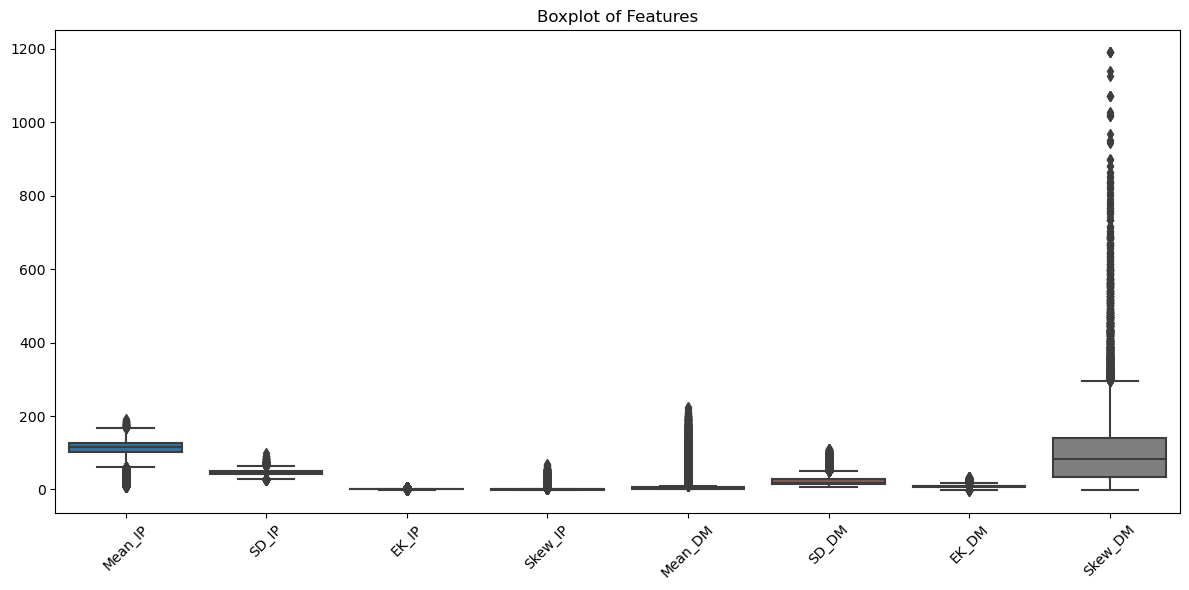

In [7]:

# 📈 Summary statistics
print("\nSummary statistics:")
print(df.describe())

# 📦 Boxplots for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns='target_class'))
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [8]:
# 🔀 Split data
X = df.drop('target_class', axis=1)
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)



X_train shape: (14318, 8)
X_test shape: (3580, 8)


In [9]:
# ⚖️ Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔄 Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print("After SMOTE:\n", pd.Series(y_resampled).value_counts())



After SMOTE:
 1    13007
0    13007
Name: target_class, dtype: int64


In [10]:
# 🧠 Store results
results = []

# 🧠 Function to train and test SVM model
def train_evaluate_model(kernel_type, C_value):
    model = SVC(kernel=kernel_type, C=C_value, gamma='auto')
    model.fit(X_resampled, y_resampled)

    train_acc = model.score(X_resampled, y_resampled)
    test_acc = model.score(X_test_scaled, y_test)

    print(f"\n🔹 Kernel: {kernel_type}, C: {C_value}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:  {test_acc:.4f}")

    # Save results
    results.append({
        "Kernel": kernel_type,
        "C": C_value,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc
    })
    return model

# 🔧 Run SVM with different kernel and C values
train_evaluate_model('rbf', 1.0)
train_evaluate_model('rbf', 100.0)
train_evaluate_model('rbf', 1000.0)

train_evaluate_model('linear', 1.0)
train_evaluate_model('linear', 100.0)
train_evaluate_model('linear', 1000.0)

train_evaluate_model('poly', 1.0)
train_evaluate_model('poly', 100.0)

train_evaluate_model('sigmoid', 1.0)
train_evaluate_model('sigmoid', 100.0)

# 🧾 Create summary table
results_df = pd.DataFrame(results)
print("\n📊 Accuracy Summary for All Kernels:")
print(results_df.sort_values(by="Test Accuracy", ascending=False).to_string(index=False))



🔹 Kernel: rbf, C: 1.0
Train Accuracy: 0.9491
Test Accuracy:  0.9718

🔹 Kernel: rbf, C: 100.0
Train Accuracy: 0.9550
Test Accuracy:  0.9704

🔹 Kernel: rbf, C: 1000.0
Train Accuracy: 0.9590
Test Accuracy:  0.9690

🔹 Kernel: linear, C: 1.0
Train Accuracy: 0.9424
Test Accuracy:  0.9718

🔹 Kernel: linear, C: 100.0
Train Accuracy: 0.9428
Test Accuracy:  0.9712

🔹 Kernel: linear, C: 1000.0
Train Accuracy: 0.9428
Test Accuracy:  0.9712

🔹 Kernel: poly, C: 1.0
Train Accuracy: 0.9342
Test Accuracy:  0.9754

🔹 Kernel: poly, C: 100.0
Train Accuracy: 0.9478
Test Accuracy:  0.9718

🔹 Kernel: sigmoid, C: 1.0
Train Accuracy: 0.8086
Test Accuracy:  0.8134

🔹 Kernel: sigmoid, C: 100.0
Train Accuracy: 0.8083
Test Accuracy:  0.8131

📊 Accuracy Summary for All Kernels:
 Kernel      C  Train Accuracy  Test Accuracy
   poly    1.0        0.934228       0.975419
    rbf    1.0        0.949066       0.971788
 linear    1.0        0.942416       0.971788
   poly  100.0        0.947759       0.971788
 linear  1

In [13]:
# 🏆 Find best model based on test accuracy
best_result = max(results, key=lambda x: x["Test Accuracy"])
print("\n🏆 Best Model:", best_result)

# 🎯 Retrain the best model
final_model = SVC(kernel=best_result["Kernel"], C=best_result["C"], gamma='auto')
final_model.fit(X_resampled, y_resampled)



🏆 Best Model: {'Kernel': 'poly', 'C': 1.0, 'Train Accuracy': 0.9342277235334819, 'Test Accuracy': 0.9754189944134078}


SVC(gamma='auto', kernel='poly')

In [15]:
import joblib

# 📦 Save the trained final model and the scaler
joblib.dump(final_model, 'svm_pulsar_model.joblib')
joblib.dump(scaler, 'svm_scaler.joblib')
print("✅ Model and scaler saved successfully.")


✅ Model and scaler saved successfully.


In [16]:
# 📥 Load model and scaler
import joblib
import numpy as np

loaded_model = joblib.load('svm_pulsar_model.joblib')
loaded_scaler = joblib.load('svm_scaler.joblib')
print("✅ Model and scaler loaded.")

# 📊 Predict on test data again (optional)
y_loaded_pred = loaded_model.predict(X_test_scaled)
print("✅ Prediction on test set:\n", y_loaded_pred[:10])

# 📉 Predict on new data sample
new_data = [[140.5, 55.6, 631.4, 1.22, 150.1, 45.3, 350.2, 2.10]]  # Replace with your own values
new_data_scaled = loaded_scaler.transform(new_data)
new_prediction = loaded_model.predict(new_data_scaled)[0]

print("🧠 New prediction (0 = non-pulsar, 1 = pulsar):", new_prediction)


✅ Model and scaler loaded.
✅ Prediction on test set:
 [0 0 0 0 0 0 0 0 1 0]
🧠 New prediction (0 = non-pulsar, 1 = pulsar): 1


C:\Users\f223178\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


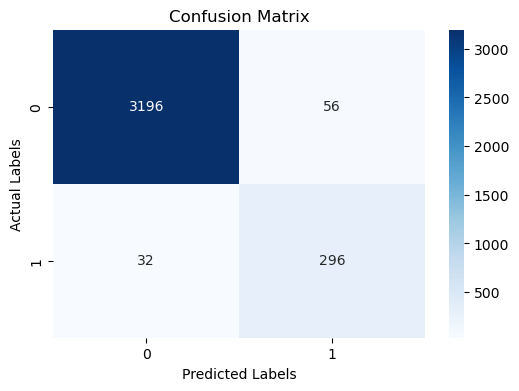

[[3196   56]
 [  32  296]]


In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Predict using your final model
y_pred = final_model.predict(X_test_scaled)

# 🔍 Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 📊 Display using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(conf_matrix)